In [24]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
from IPython.display import display, HTML

# 1. Figure out “today” and one year ago
today       = date.today()
one_year_ago = today - timedelta(days=365)

start_str = one_year_ago.strftime("%Y-%m-%d")
end_str   = today.strftime("%Y-%m-%d")

# 2. Pick some big Indian stocks to download
symbols = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

# 3. Grab the raw OHLCV data from Yahoo Finance
raw_data = yf.download(
    symbols,
    start=start_str,
    end=end_str,
    auto_adjust=False,    # so we can see the actual Open/High/Low/Close
    progress=False
)

# 4. Turn the wide MultiIndex into tidy rows
raw_data.columns.names = ['Field', 'Ticker']
tidy = (
    raw_data
    .stack(level='Ticker', future_stack=True)
    .reset_index()
)

# 5. Rename “Date” to “Date”–friendly “Date”
tidy = tidy.rename(columns={'Date': 'Date'})

# 6. Pick and order the columns just how you like them
tidy = tidy[['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]

# 7. Peek at the first five rows with a neat border and centered text
header_html = "<h4 style='margin-top:20px;'>📈 Sample Stock Price Data (Past 12 Months)</h4>"
display(HTML(header_html))

styled = (
    tidy.head()
        .style
        .set_table_styles([
            {'selector': 'th',    'props': [('font-weight', 'bold'),
                                            ('border', '1px solid black')]},
            {'selector': 'td',    'props': [('border', '1px solid black')]},
            {'selector': 'table', 'props': [('border', '2px solid black'),
                                            ('border-collapse', 'collapse')]}
        ])
        .set_properties(**{'text-align': 'center'})
)

display(styled)


Field,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2024-07-11 00:00:00,HDFCBANK.NS,1604.251587,1621.900024,1625.849976,1601.000000,1623.949951,22088537
1,2024-07-11 00:00:00,INFY.NS,1611.421021,1652.699951,1665.000000,1642.050049,1656.000000,8857679
2,2024-07-11 00:00:00,RELIANCE.NS,1575.303467,1580.650024,1604.250000,1570.500000,1587.500000,11940946
3,2024-07-11 00:00:00,TCS.NS,3870.677246,3923.699951,3980.000000,3895.600098,3931.000000,4872189
4,2024-07-12 00:00:00,HDFCBANK.NS,1605.042725,1622.699951,1638.400024,1611.150024,1622.000000,28024980


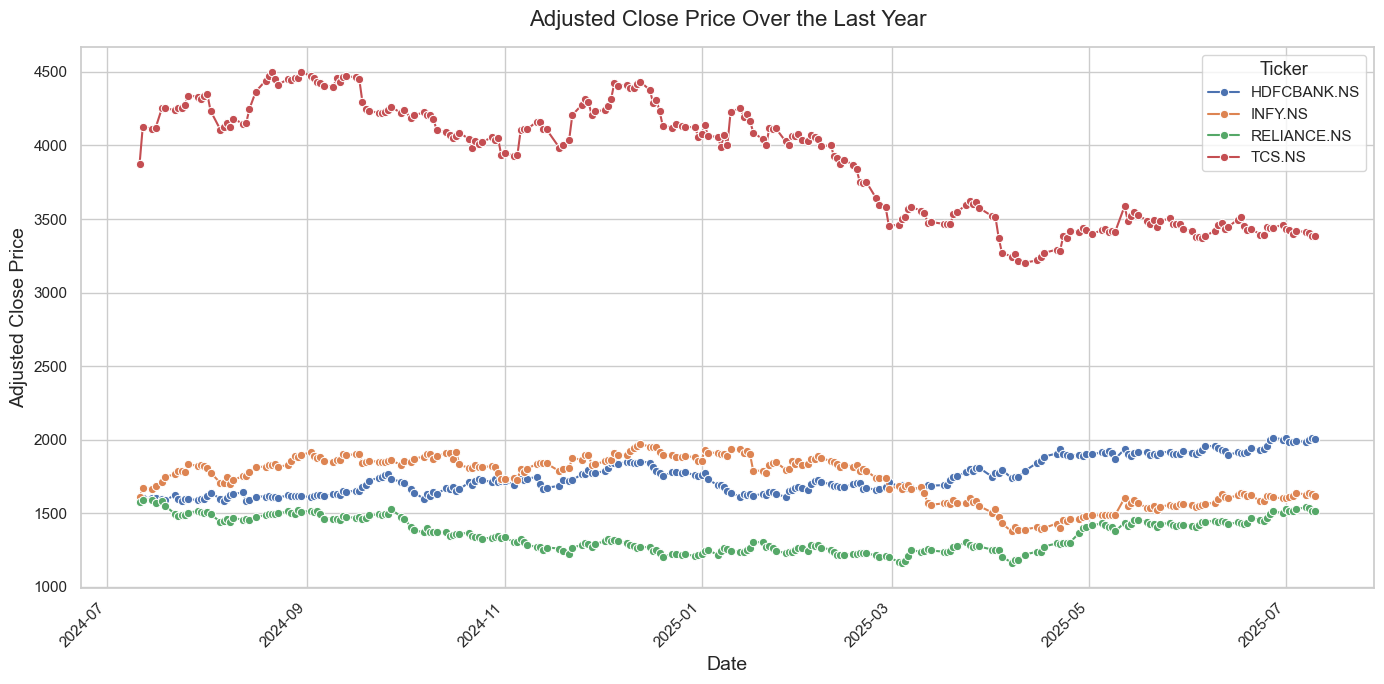

In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# 1️⃣ Figure out our time window: today, and exactly one year before
today       = date.today()
one_year_ago = today - timedelta(days=365)
end_str     = today.strftime("%Y-%m-%d")
start_str   = one_year_ago.strftime("%Y-%m-%d")

# 2️⃣ Choose the big Indian stocks we care about
symbols = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

# 3️⃣ Download the last 12 months of raw OHLCV data
raw_prices = yf.download(
    symbols,
    start=start_str,
    end=end_str,
    auto_adjust=False,   # keep the original Open/High/Low/Close
    progress=False
)

# 4️⃣ Tidy up the multi-level columns into a simple table
raw_prices.columns.names = ['Field', 'Ticker']
price_data = (
    raw_prices
    .stack(level='Ticker', future_stack=True)
    .reset_index()
    .rename(columns={'Date': 'Date'})  # just to keep naming consistent
)

# 5️⃣ Pick only the columns we actually want, in the order we like
price_data = price_data[[
    'Date', 'Ticker', 'Adj Close', 'Close', 
    'High', 'Low', 'Open', 'Volume'
]]

# 6️⃣ Convert “Date” into a true datetime and sort chronologically
price_data['Date'] = pd.to_datetime(price_data['Date'])
price_data = price_data.sort_values('Date')

# 7️⃣ Draw the time-series chart
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(
    data=price_data,
    x='Date',
    y='Adj Close',
    hue='Ticker',
    marker='o'
)

# 8️⃣ Add some finishing touches: titles, labels, and a neat layout
plt.title('Adjusted Close Price Over the Last Year', fontsize=16, pad=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize=13, fontsize=11, frameon=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # ensures nothing is cut off
plt.show()


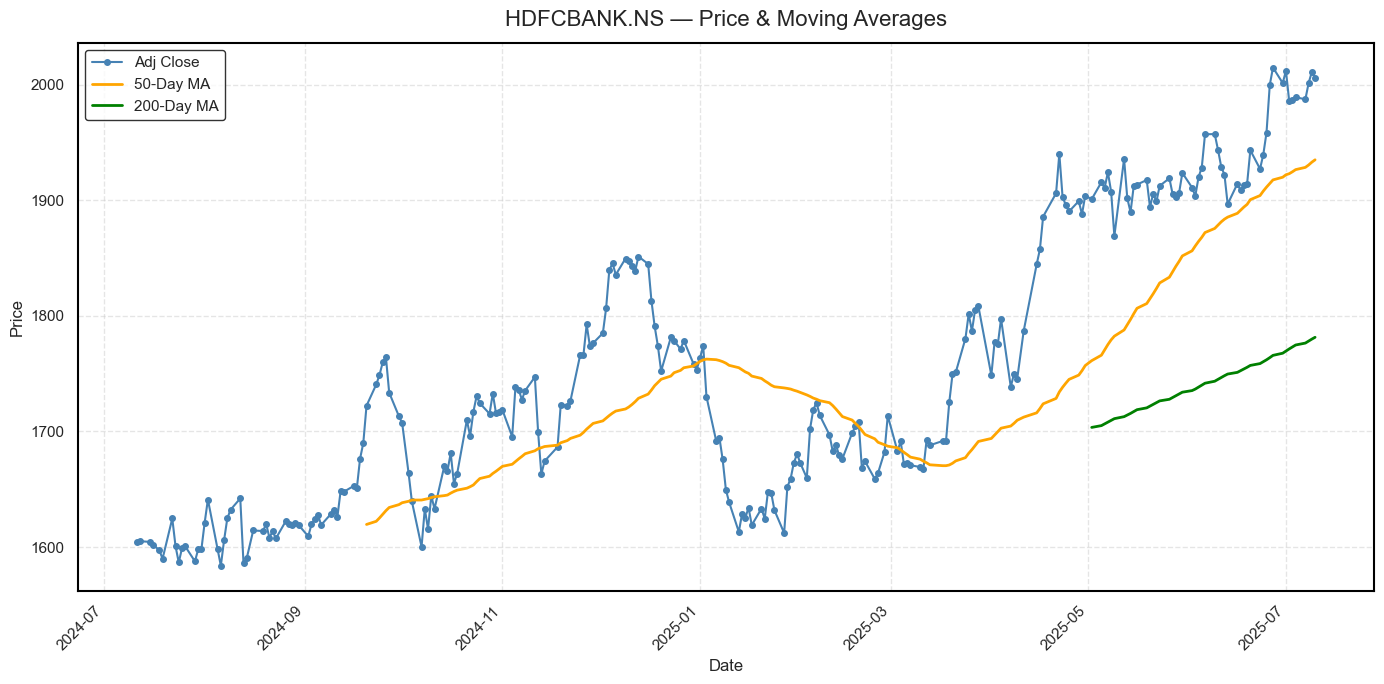

<div style='height:50px'></div>

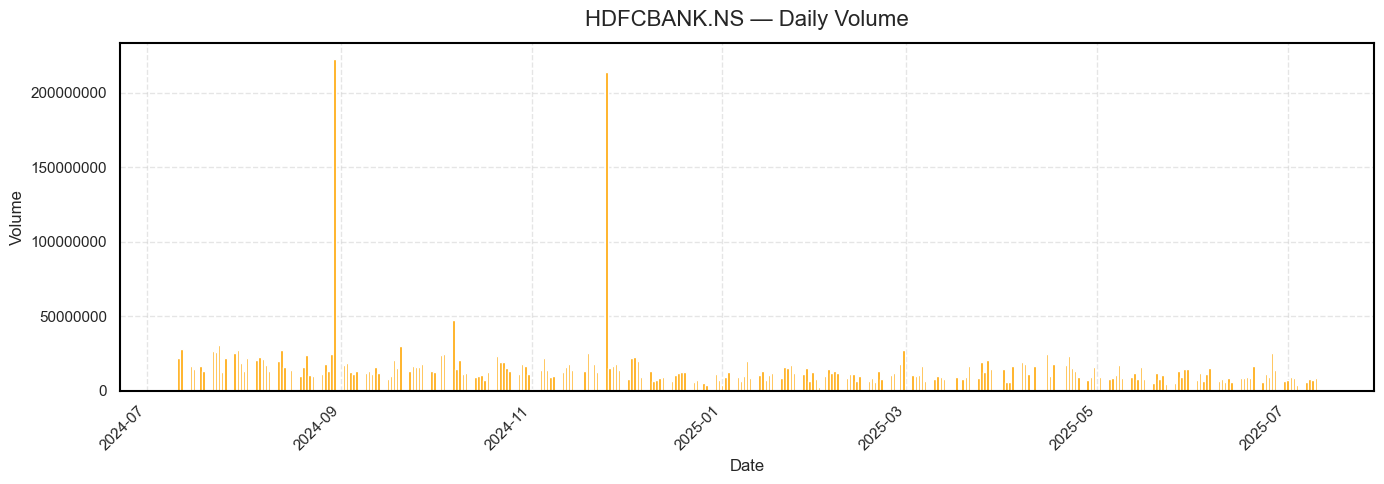

<div style='height:50px'></div>

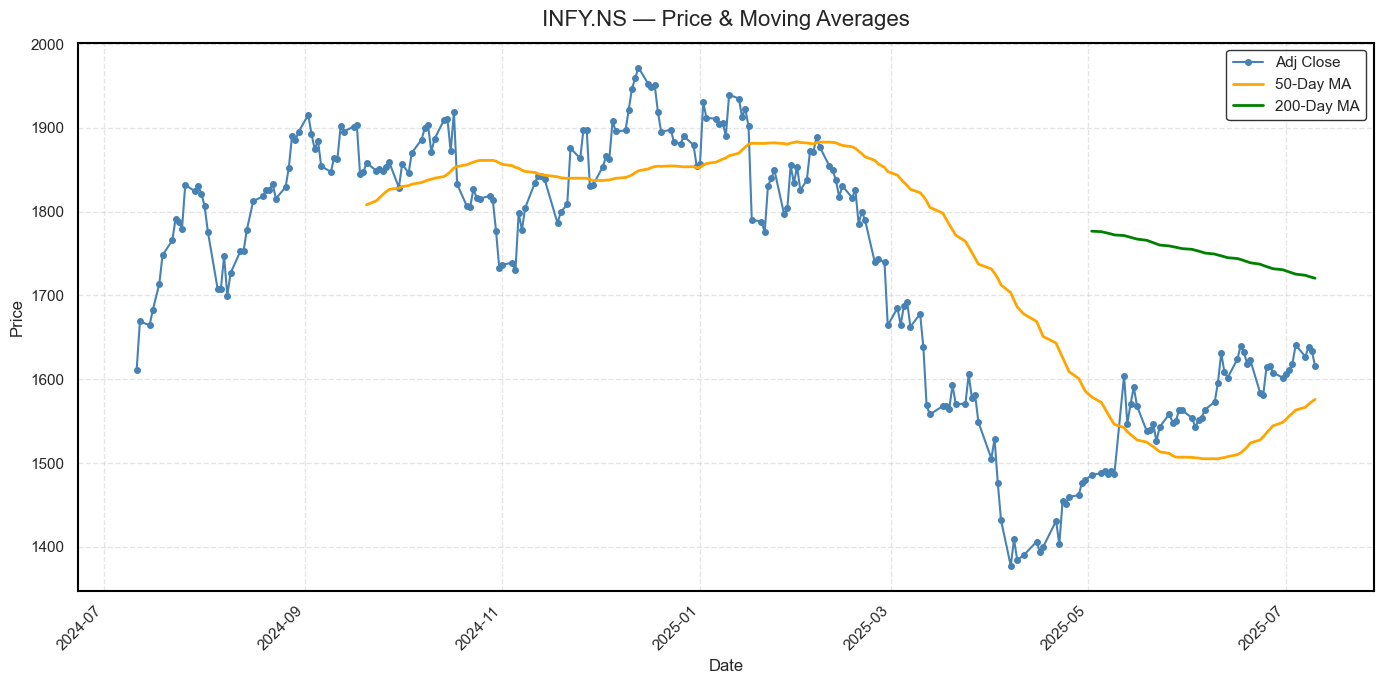

<div style='height:50px'></div>

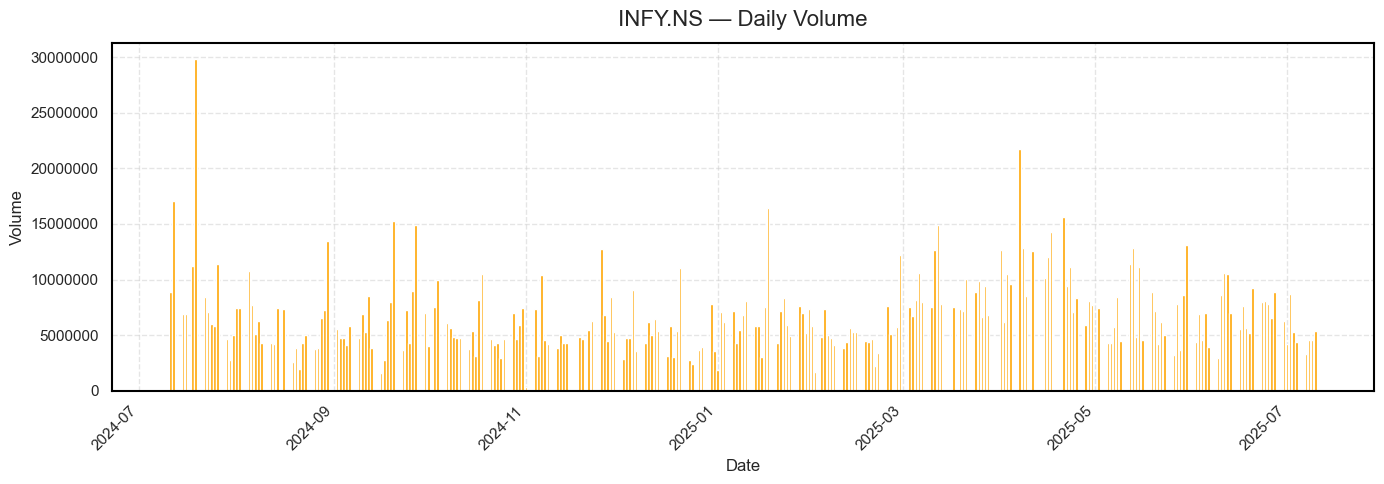

<div style='height:50px'></div>

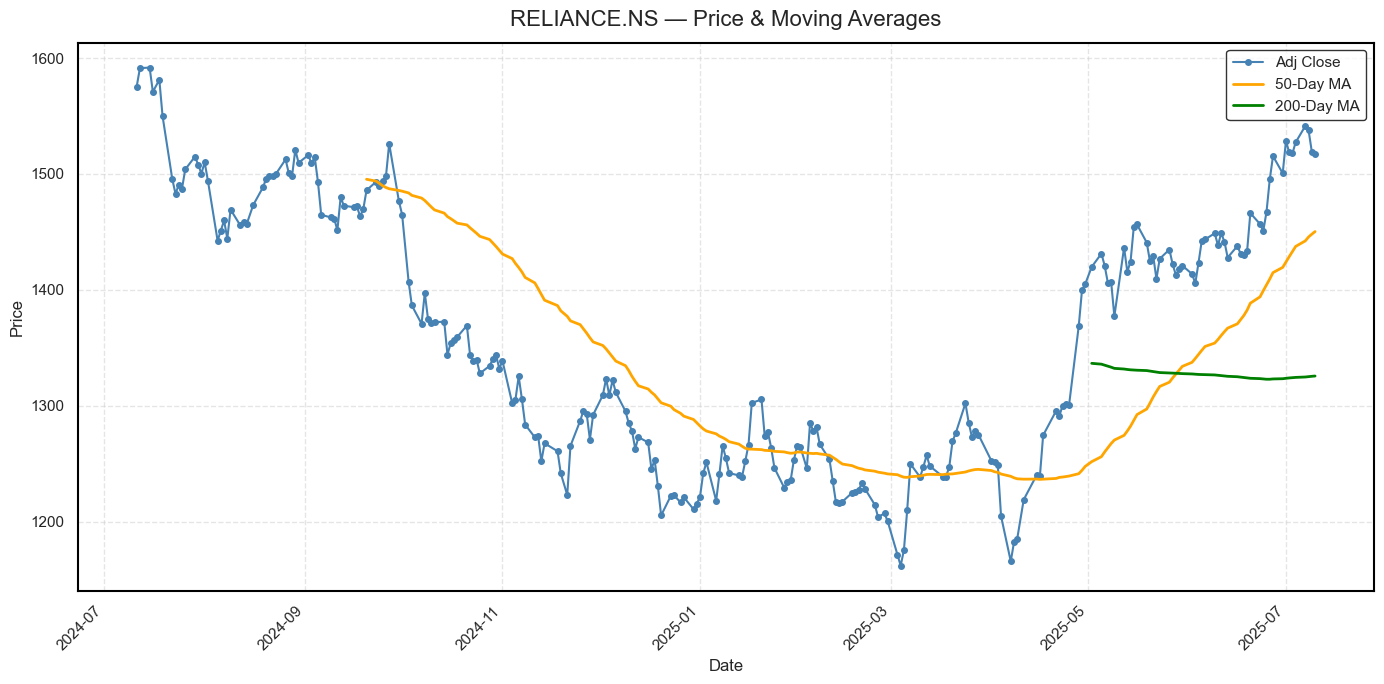

<div style='height:50px'></div>

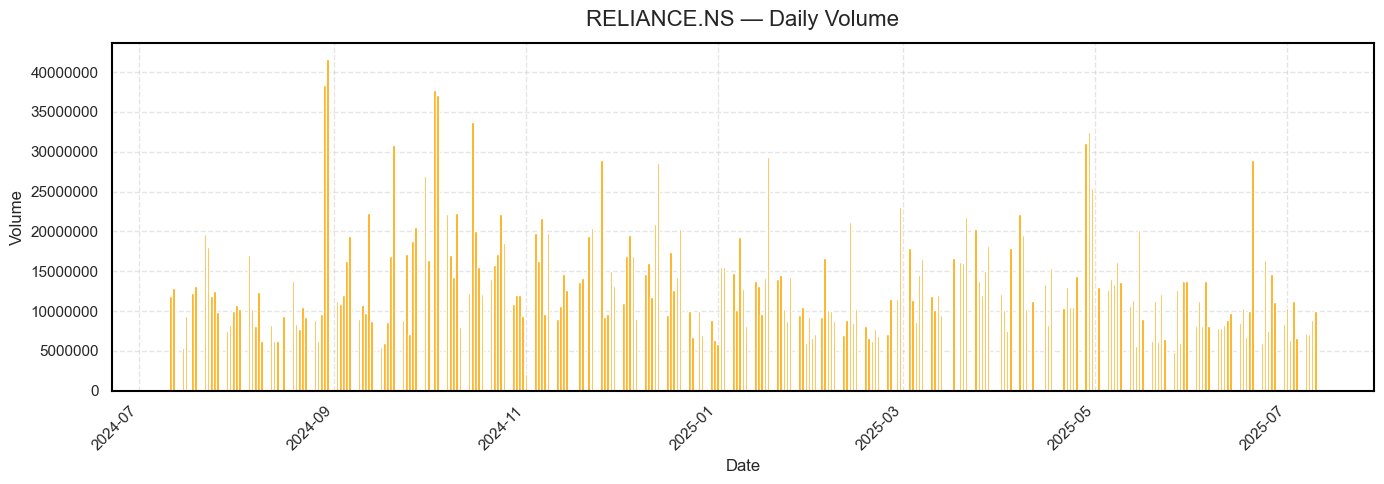

<div style='height:50px'></div>

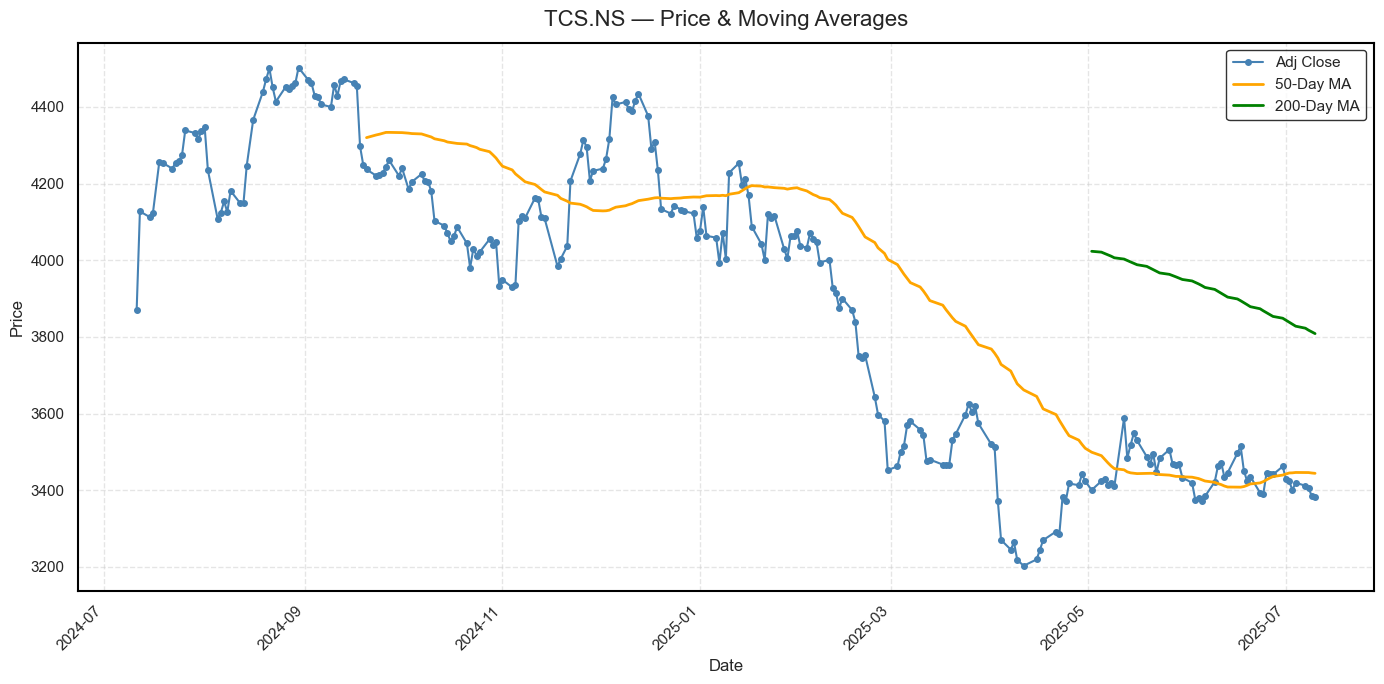

<div style='height:50px'></div>

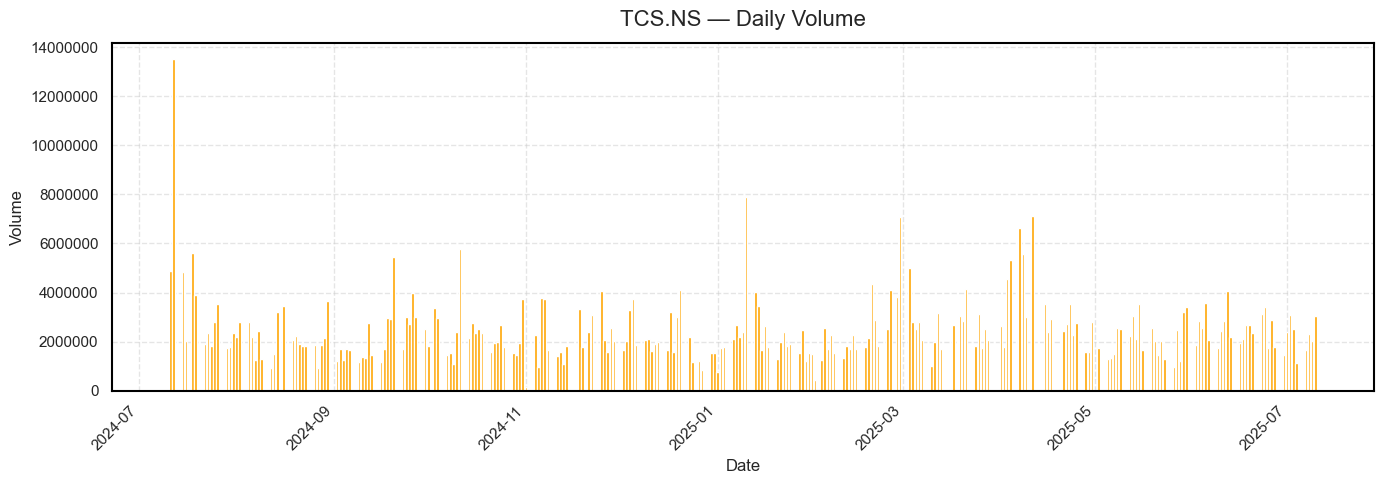

<div style='height:50px'></div>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# 1️⃣ Start with our tidy price DataFrame (from the earlier steps)
chart_data = data.copy()

# 2️⃣ Make sure our “Date” column is real datetime, then set it as the index
chart_data['Date'] = pd.to_datetime(chart_data['Attribute'])
chart_data = chart_data.set_index('Date')

# 3️⃣ Define how many days for our moving averages
short_window = 50
long_window  = 200

# 4️⃣ Loop through each stock so we can draw two charts per ticker
for symbol in chart_data['Ticker'].unique():
    single = chart_data[chart_data['Ticker'] == symbol].copy()
    
    # Calculate the moving averages
    single['MA_50']  = single['Adj Close'].rolling(short_window).mean()
    single['MA_200'] = single['Adj Close'].rolling(long_window).mean()
    
    # ——— Chart A: Price plus Moving Averages ———
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Give the plot a neat black border by thickening the spines
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)
    
    # Plot the adjusted close price and both moving averages
    ax.plot(single.index, single['Adj Close'], 'o-',
            label='Adj Close', color='steelblue', markersize=4)
    ax.plot(single.index, single['MA_50'],  label='50-Day MA',
            color='orange', linewidth=2)
    ax.plot(single.index, single['MA_200'], label='200-Day MA',
            color='green', linewidth=2)
    
    # Title, labels, and legend styling
    ax.set_title(f"{symbol} — Price & Moving Averages", fontsize=16, pad=12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(frameon=True, edgecolor='black')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Rotate the dates so they’re readable
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    display(fig)
    plt.close(fig)
    
    # Give a vertical breather before the next chart
    display(Markdown("<div style='height:50px'></div>"))
    
    # ——— Chart B: Volume Traded ———
    fig, ax = plt.subplots(figsize=(14, 5))
    
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)
    
    ax.bar(single.index, single['Volume'], color='orange')
    ax.ticklabel_format(axis='y', style='plain', useOffset=False)
    ax.set_title(f"{symbol} — Daily Volume", fontsize=16, pad=12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    display(fig)
    plt.close(fig)
    
    # Another spacer before we move on to the next stock
    display(Markdown("<div style='height:50px'></div>"))


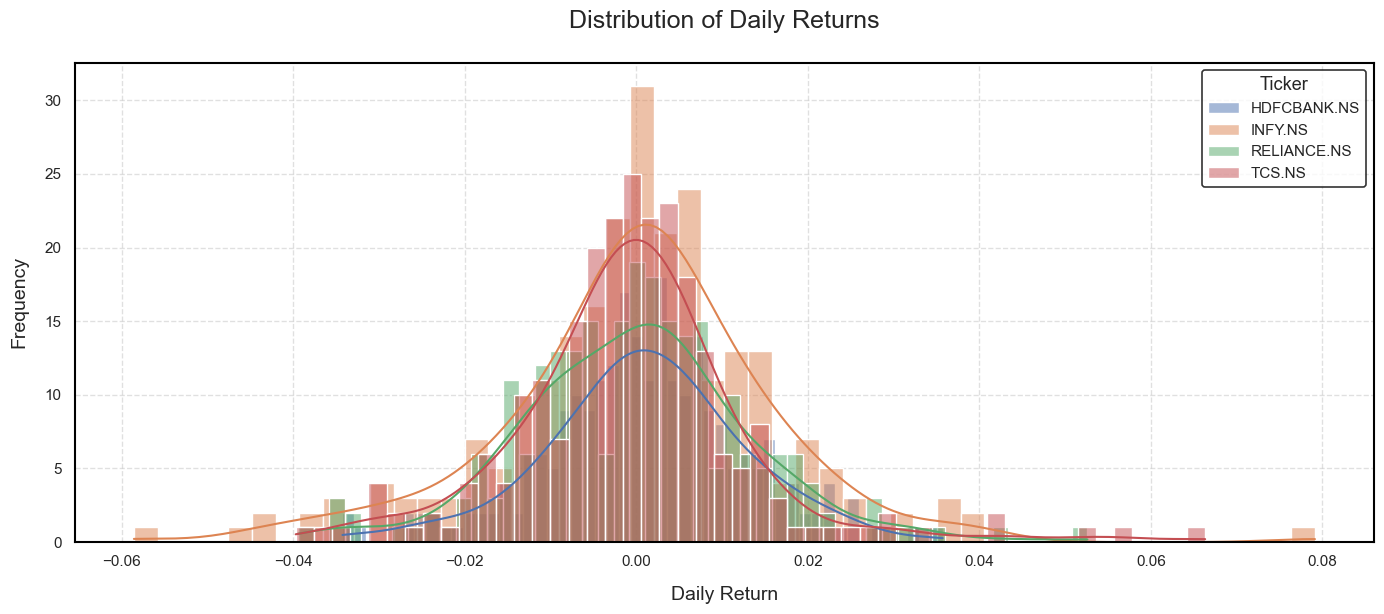

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Start with a fresh copy of your stock data
returns_df = stock_data.copy()

# 2️⃣ Calculate daily returns if we haven’t already done so
if 'Daily Return' not in returns_df.columns:
    returns_df['Daily Return'] = (
        returns_df
        .groupby('Ticker')['Adj Close']
        .pct_change()
    )

# 3️⃣ Prepare the canvas for our histogram
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

# 4️⃣ Plot the distribution for each stock’s daily returns
for symbol in returns_df['Ticker'].unique():
    hist_data = returns_df.loc[
        returns_df['Ticker'] == symbol, 
        'Daily Return'
    ].dropna()
    
    sns.histplot(
        hist_data,
        bins=50,
        kde=True,
        label=symbol,
        alpha=0.5
    )

# 5️⃣ Make it look nice: title, labels, and padding
ax = plt.gca()
ax.set_title('Distribution of Daily Returns', fontsize=18, pad=25)
ax.set_xlabel('Daily Return', fontsize=14, labelpad=12)
ax.set_ylabel('Frequency', fontsize=14, labelpad=12)

# 6️⃣ Add a boxed legend
legend = ax.legend(title='Ticker', title_fontsize=13, fontsize=11, frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.2)

# 7️⃣ Draw a strong border around the plot area
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# 8️⃣ Tidy up the grid and layout
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 1, 0.90])  # reserve space at the top
plt.show()


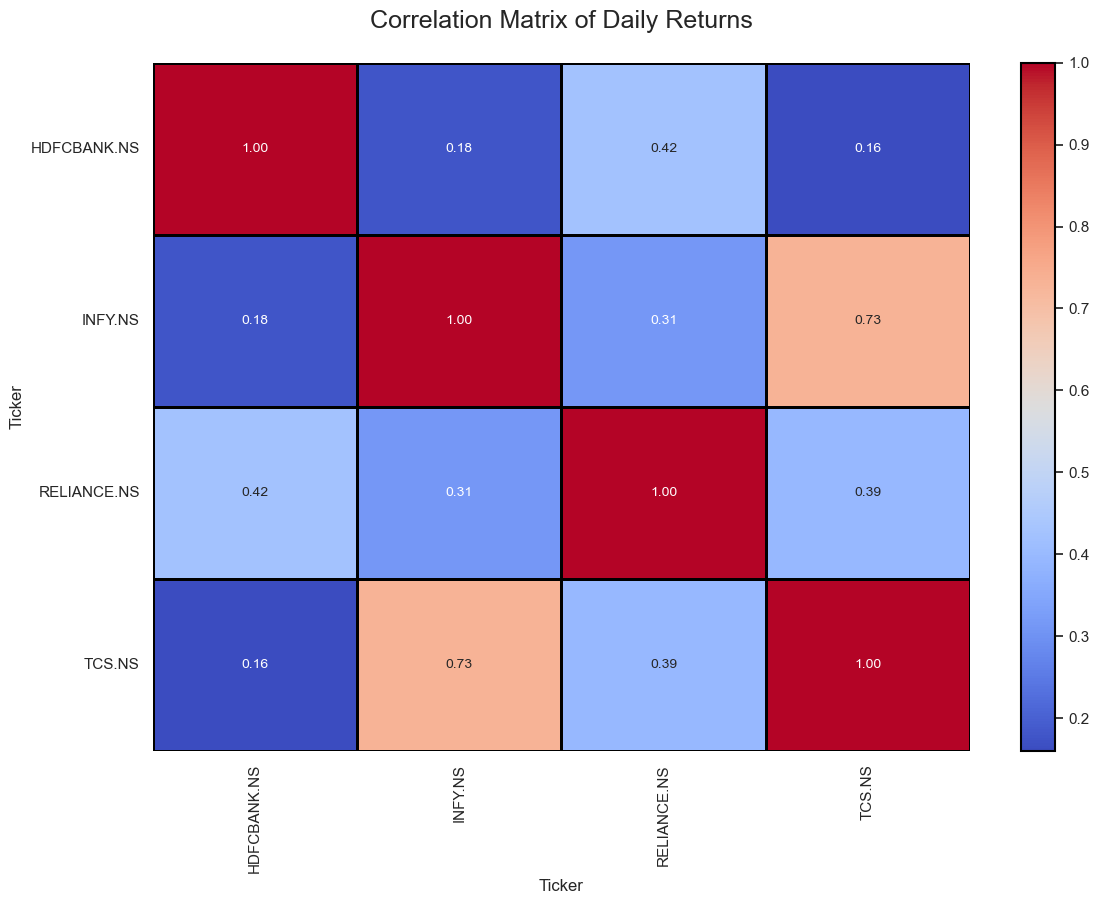

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Make a working copy of your stock data
working_df = stock_data.copy()

# 2️⃣ Ensure daily returns are calculated
if 'Daily Return' not in working_df.columns:
    working_df['Daily Return'] = (
        working_df
        .groupby('Ticker')['Adj Close']
        .pct_change()
    )

# 3️⃣ Pivot the data so each column is a stock and each row is a date
returns_pivot = (
    working_df
    .pivot_table(
        index='Attribute',    # the date column
        columns='Ticker',      # one column per stock
        values='Daily Return'  # our daily-return values
    )
    .dropna()  # drop any dates where data is missing
)

# 4️⃣ Compute the correlation matrix of returns
correlation_matrix = returns_pivot.corr()

# 5️⃣ Set up our canvas
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

# 6️⃣ Draw the heatmap with cell borders
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,            # show the correlation numbers
    fmt='.2f',             # two decimal places
    annot_kws={'size': 10},
    cmap='coolwarm',       # color scheme from blue to red
    linewidths=1,          # lines between cells
    linecolor='black'      # cell-border color
)

# 7️⃣ Tidy up the colorbar so it’s outlined in black
cbar = heatmap.collections[0].colorbar
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(1.5)

# 8️⃣ Add a clear, padded title
ax = heatmap.axes
ax.set_title('Correlation Matrix of Daily Returns', fontsize=18, pad=25)

# 9️⃣ Rotate the labels so they’re readable
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# 🔟 Frame the entire chart with thicker black lines
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# 1️⃣1️⃣ Give everything a snug layout with extra space at the top
plt.tight_layout(rect=[0, 0, 1, 0.92])

# 1️⃣2️⃣ Finally, display it
plt.show()


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1) Prepare the metrics table
df = stock_data.copy()
if 'Daily Return' not in df.columns:
    df['Daily Return'] = df.groupby('Ticker')['Adj Close'].pct_change()

date_col = 'Attribute' if 'Attribute' in df.columns else 'Date'
daily_returns = df.pivot_table(index=date_col, columns='Ticker', values='Daily Return').dropna()

TRADING_DAYS    = 252
exp_rets        = daily_returns.mean() * TRADING_DAYS
vols            = daily_returns.std()  * np.sqrt(TRADING_DAYS)
stock_stats     = pd.DataFrame({'Expected Return': exp_rets, 'Volatility': vols})

# 2) Highlight these four cells only:
deep_blue_coords = [
    ('HDFCBANK.NS', 'Expected Return'),  # corrected
    ('RELIANCE.NS','Volatility'),
    ('TCS.NS',      'Volatility'),
    ('INFY.NS',     'Volatility'),
]

# 3) Styling function: off‐white base, then light‐blue override
def highlight_cells(df):
    base = pd.DataFrame('background-color: #f8f8f8', index=df.index, columns=df.columns)
    for row_label, col in deep_blue_coords:
        if row_label in base.index and col in base.columns:
            base.at[row_label, col] = 'background-color: #bdd7e7'
    return base

# 4) Build and show the styled table
styled = (
    stock_stats.style
        .apply(highlight_cells, axis=None)
        .set_properties(**{
            'border':        '1px solid black',
            'text-align':    'center',
            'font-family':   'Arial',
            'font-size':     '13px',
            'padding':       '6px'
        })
        .set_table_styles([
            {'selector':'th','props':[
                ('background-color','#f0f0f0'),
                ('border','1px solid black'),
                ('text-align','center'),
                ('font-weight','bold'),
                ('font-family','Arial'),
                ('font-size','14px')
            ]},
            {'selector':'table','props':[
                ('border-collapse','collapse'),
                ('border','2px solid black')
            ]}
        ])
)

display(styled)


,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.244248,0.184468
INFY.NS,0.035005,0.254452
RELIANCE.NS,-0.015646,0.212904
TCS.NS,-0.113844,0.216869


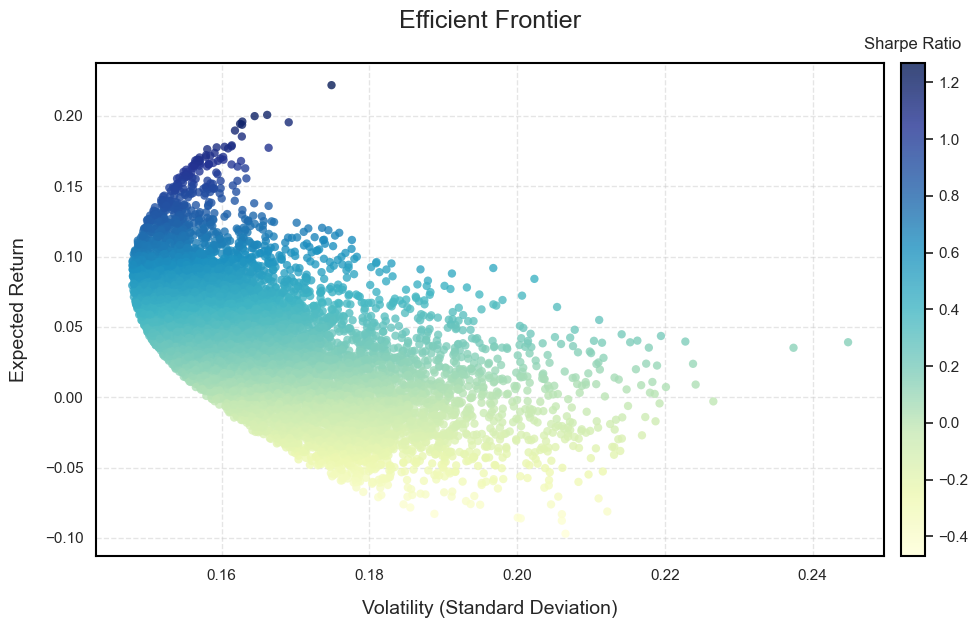

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Define a helper that tells us how a given mix of stocks performs
def compute_portfolio_performance(weights, avg_returns, covariance):
    """
    Given:
      • weights    – an array of portfolio weights summing to 1
      • avg_returns – a vector of each stock’s expected annual return
      • covariance  – the annualized covariance matrix
    Returns a tuple: (portfolio_return, portfolio_volatility)
    """
    # expected return is the weighted sum of each stock’s return
    portfolio_return = np.dot(weights, avg_returns)
    # volatility is the square root of wᵀ Σ w
    portfolio_volatility = np.sqrt(weights.T @ covariance @ weights)
    return portfolio_return, portfolio_volatility

# 2️⃣ Let’s simulate many random portfolios to sketch out the efficient frontier
num_portfolios = 10_000
tickers_list   = daily_returns.columns
# we’ll store return, volatility, and Sharpe ratio for each trial
results = np.zeros((3, num_portfolios))

# pre-compute the annual covariance matrix
annual_cov = daily_returns.cov() * 252

np.random.seed(42)  # ensure reproducibility
for i in range(num_portfolios):
    # generate a random set of weights, then normalize to sum to 1
    random_weights = np.random.random(len(tickers_list))
    random_weights /= random_weights.sum()
    
    # compute how that portfolio would perform
    ret, vol = compute_portfolio_performance(
        random_weights,
        expected_returns,
        annual_cov
    )
    
    results[0, i] = ret
    results[1, i] = vol
    results[2, i] = ret / vol  # the Sharpe ratio (return per unit of risk)

# 3️⃣ Now let’s plot the efficient frontier with a Sharpe‐ratio color scale
fig, ax = plt.subplots(figsize=(10, 7))

# give the plot a neat black frame by thickening its borders
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# scatter each simulated portfolio: x = risk, y = return, color = Sharpe
scatter = ax.scatter(
    results[1, :],        # volatility on the x-axis
    results[0, :],        # return on the y-axis
    c=results[2, :],      # color by Sharpe ratio
    cmap='YlGnBu',        # from yellow (low) through green to blue (high)
    marker='o',
    alpha=0.8,
    edgecolors='none'
)

# label it all clearly
ax.set_title('Efficient Frontier', fontsize=18, pad=25)
ax.set_xlabel('Volatility (Standard Deviation)', fontsize=14, labelpad=12)
ax.set_ylabel('Expected Return', fontsize=14, labelpad=12)

# add a colorbar showing the Sharpe‐ratio scale
cbar = fig.colorbar(scatter, ax=ax, pad=0.02, fraction=0.045)
cbar.ax.set_title('Sharpe Ratio', fontsize=12, pad=10)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(1.5)

# clean up the grid and layout
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.92])

plt.show()


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

# 1️⃣ Find which simulated portfolio gave us the highest Sharpe ratio
best_index      = np.argmax(results[2])
best_return     = results[0, best_index]
best_volatility = results[1, best_index]
best_sharpe     = results[2, best_index]

# 2️⃣ Pack those metrics into a simple table
metrics = pd.DataFrame({
    "Metric": ["Expected Return (%)", "Volatility (%)", "Sharpe Ratio"],
    "Value (%)": [
        round(best_return * 100, 2),
        round(best_volatility * 100, 2),
        round(best_sharpe, 2)
    ]
})

# 3️⃣ Create a soft pink-to-medium-pink gradient
pink_cmap = sns.light_palette("#FF99CC", as_cmap=True)

# 4️⃣ Style the table using our pink palette
styled_metrics = (
    metrics.style
        .background_gradient(
            cmap=pink_cmap,
            subset=["Value (%)"],
            low=0.2,  # ensures the lightest pink for lower values
            high=0.8  # ensures a medium pink for higher values
        )
        .set_properties(**{
            "border":       "1px solid black",
            "text-align":   "center",
            "font-family":  "Arial",
            "font-size":    "13px",
            "padding":      "6px"
        })
        .set_table_styles([
            {
                "selector": "th",
                "props": [
                    ("background-color", "#f0f0f0"),
                    ("border",           "1px solid black"),
                    ("text-align",       "center"),
                    ("font-weight",      "bold"),
                    ("font-size",        "14px"),
                    ("font-family",      "Arial")
                ]
            },
            {
                "selector": "table",
                "props": [
                    ("border-collapse", "collapse"),
                    ("border",          "2px solid black")
                ]
            }
        ])
)

# 5️⃣ Display the polished, pink-highlighted table
display(styled_metrics)


,Metric,Value (%)
0,Expected Return (%),22.190000
1,Volatility (%),17.490000
2,Sharpe Ratio,1.270000


In [39]:
import pandas as pd
import numpy as np

# 1️⃣ Find the portfolio with the best Sharpe ratio
best_portfolio_idx = np.argmax(results[2])

# 2️⃣ Reconstruct the weights for that winning portfolio
np.random.seed(42)
optimal_weights = np.zeros(len(unique_tickers))

for trial in range(num_portfolios):
    # create a random guess and normalize to sum to 1
    guess = np.random.random(len(unique_tickers))
    guess /= guess.sum()
    
    # check if this guess matches the best Sharpe scenario
    if results[2, trial] == results[2, best_portfolio_idx]:
        optimal_weights = guess
        break

# 3️⃣ Put tickers, raw weights, and percentages into a friendly table
portfolio_summary = pd.DataFrame({
    'Ticker':       unique_tickers,
    'Weight':       optimal_weights,
    'Weight (%)':   np.round(optimal_weights * 100, 2)
})

# 4️⃣ Make the largest “Weight (%)” jump out with a soft orange highlight
def highlight_top(series):
    max_flag = series == series.max()
    return ['background-color: #FFE5B4' if is_max else '' for is_max in max_flag]

styled_summary = (
    portfolio_summary.style
        # only highlight the percentage column
        .apply(highlight_top, subset=['Weight (%)'])
        # apply consistent borders, fonts, and centering
        .set_properties(**{
            'border':       '1px solid black',
            'text-align':   'center',
            'font-family':  'Arial',
            'font-size':    '13px',
            'padding':      '6px'
        })
        .set_table_styles([
            {
                'selector': 'th',
                'props': [
                    ('background-color', '#f0f0f0'),
                    ('border',           '1px solid black'),
                    ('text-align',       'center'),
                    ('font-weight',      'bold'),
                    ('font-family',      'Arial'),
                    ('font-size',        '14px')
                ]
            },
            {
                'selector': 'table',
                'props': [
                    ('border-collapse', 'collapse'),
                    ('border',          '2px solid black')
                ]
            }
        ])
)

# 5️⃣ Show our neatly formatted table in the notebook
display(styled_summary)


,Ticker,Weight,Weight (%)
0,HDFCBANK.NS,0.923909,92.390000
1,INFY.NS,0.020470,2.050000
2,RELIANCE.NS,0.018671,1.870000
3,TCS.NS,0.036950,3.700000


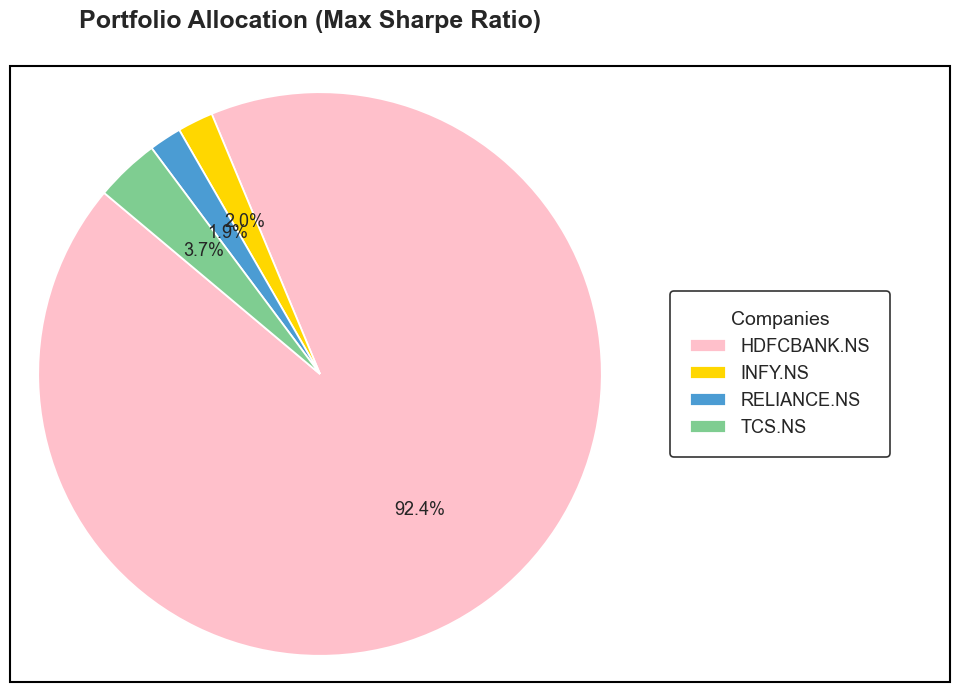

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1️⃣ Gather our tickers and their optimal weights
tickers = portfolio_df['Ticker']
weights = portfolio_df['Weight']

# 2️⃣ Pick a friendly palette (pink, yellow, blue, green)
slice_colors = ['#FFC0CB', '#FFD700', '#4B9CD3', '#7FCD91']

# 3️⃣ Prepare a square canvas for our pie + legend
fig, ax = plt.subplots(figsize=(8, 8))

# 4️⃣ Draw the pie slices with neat white gaps and thin black outlines
wedges, _, autotexts = ax.pie(
    weights,
    labels=None,              # we'll rely on a legend instead
    autopct='%1.1f%%',
    startangle=140,
    colors=slice_colors,
    wedgeprops={'linewidth': 1.3, 'edgecolor': 'white'},
    textprops={'fontsize': 13, 'fontfamily': 'Arial'}
)

# 5️⃣ Keep the pie perfectly circular
ax.axis('equal')

# 6️⃣ Place a legend box to the right, inside our future outer border
legend = ax.legend(
    wedges,
    tickers,
    title="Companies",
    title_fontsize=14,
    fontsize=13,
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    frameon=True,
    borderpad=1.1
)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.2)

# 7️⃣ Slightly tighten the top margin so our header sits just above the border
plt.subplots_adjust(top=0.88)

# 8️⃣ Add a centered title just outside the chart border
fig.suptitle(
    'Portfolio Allocation (Max Sharpe Ratio)',
    fontsize=18,
    fontweight='bold',
    fontfamily='Arial',
    y=0.95,      # a bit lower than before for less gap
    ha='center'
)

# 9️⃣ Draw an outer frame that wraps both pie and legend
chart_box = ax.get_position()
# expand the box to include the legend area
x0, y0 = chart_box.x0, chart_box.y0
width = chart_box.width + 0.40   # add room for legend
height = chart_box.height
outer_border = patches.Rectangle(
    (x0, y0),
    width,
    height,
    linewidth=1.5,
    edgecolor='black',
    facecolor='none',
    transform=fig.transFigure,
    zorder=1000
)
fig.patches.append(outer_border)

# 🔟 Show everything
plt.show()
